<div style="line-height: 0.4;">
    <h1 style="color: green; font-weight: bold; text-align: center;"></h1>
    <h1 style="color: green; font-weight: bold; text-align: center;">TEOREMAS DE RENOVACIÓN</h1>
    <h3 style="color: darkolivegreen; font-weight: bold; text-align: center;">CURSO 4 (PROCESOS ESTOCÁSTICOS 2)</h3>
    <h5 style="color: darkolivegreen; font-weight: bold; text-align: center;">PARTE 2 / LECCIÓN 3</h5>
</div>

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 1</h4>

<h3>Simulación del Proceso de Renovación y Comprobación de Convergencia</h3> 

El primer ejercicio consiste en simular un proceso de renovación y verificar si $N_t$ crece a infinito conforme $t \to \infty$, tal como se afirma en el *Teorema 1*.

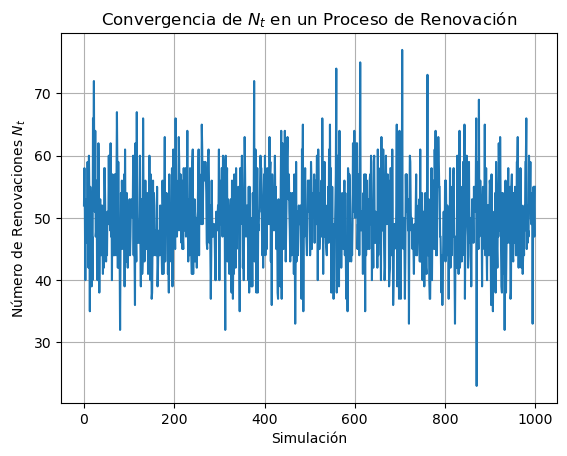

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
lambda_rate = 1  # Tasa del proceso de renovación (Poisson)
t_max = 50  # Tiempo máximo
num_renovaciones = 1000  # Número de renovaciones simuladas

# Función para simular un proceso de renovación
def proceso_renovacion(lambda_rate, t_max):
    tiempos_de_vida = []
    t = 0
    while t < t_max:
        tiempo_vida = np.random.exponential(1 / lambda_rate)
        t += tiempo_vida
        if t <= t_max:
            tiempos_de_vida.append(t)
    return len(tiempos_de_vida)

# Simulación
renovaciones = [proceso_renovacion(lambda_rate, t_max) for _ in range(num_renovaciones)]

# Mostrar los resultados
plt.plot(range(num_renovaciones), renovaciones)
plt.xlabel('Simulación')
plt.ylabel('Número de Renovaciones $N_t$')
plt.title('Convergencia de $N_t$ en un Proceso de Renovación')
plt.grid(True)
plt.show()


<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 2</h4>

<h3>Aplicación de la Ecuación de Renovación</h3> 

Aquí vamos a aplicar la \textit{ecuación de renovación} $\Lambda(t) = F(t) + \int_0^t \Lambda(t - s) dF(s)$ de manera iterativa. Vamos a calcular $\Lambda(t)$ en un proceso de renovación con una distribución exponencial de los tiempos de vida.

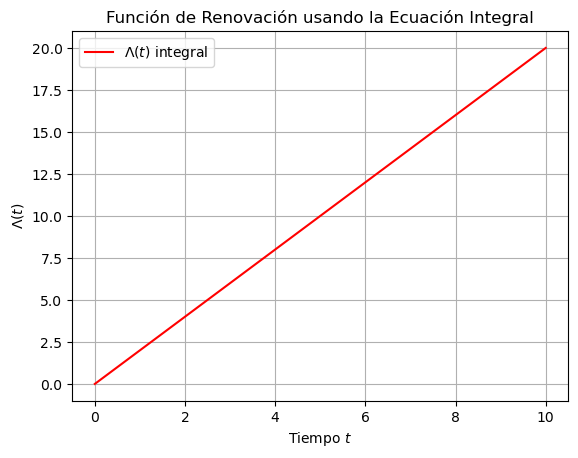

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
lambda_rate = 1  # Tasa de la distribución exponencial
t_max = 10  # Tiempo máximo

# Función de distribución F(t) para un proceso de Poisson
def F_t(t, lambda_rate):
    return 1 - np.exp(-lambda_rate * t)

# Función para calcular la integral de renovación de manera iterativa
def lambda_integral(t, lambda_rate):
    F_t_value = F_t(t, lambda_rate)
    s_values = np.linspace(0, t, 100)
    integrand = [(1 + F_t(t - s, lambda_rate) if t - s >= 0 else 0) for s in s_values]
    integral = np.trapz(integrand, s_values)
    return F_t_value + integral

# Calcular y graficar la función de renovación
t_values = np.linspace(0, t_max, 100)
lambda_values = [lambda_integral(t, lambda_rate) for t in t_values]

# Graficar la función de renovación
plt.plot(t_values, lambda_values, label=r'$\Lambda(t)$ integral', color='r')
plt.xlabel('Tiempo $t$')
plt.ylabel(r'$\Lambda(t)$')
plt.title('Función de Renovación usando la Ecuación Integral')
plt.grid(True)
plt.legend()
plt.show()


<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 3</h4>

<h3>Comprobación del Teorema de Renovación de Blackwell</h3> 

En este ejercicio, comprobamos el *Teorema 3 de Blackwell*, que afirma que si la función $F(t)$ no es aritmética, la diferencia $\Lambda(t+h) - \Lambda(t)$ se estabiliza conforme $t \to \infty$.

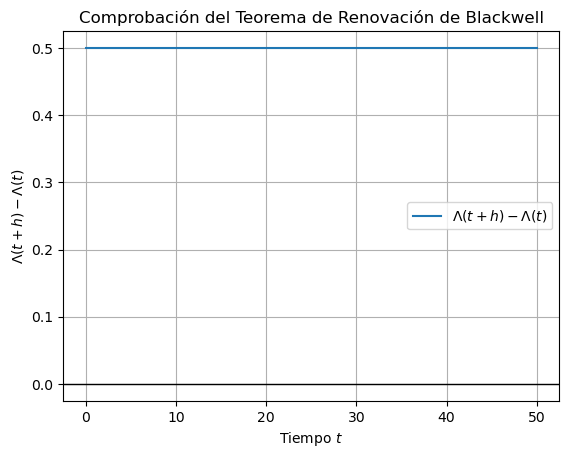

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
lambda_rate = 1  # Tasa de la distribución exponencial
h = 0.5  # Incremento
t_max = 50  # Tiempo máximo

# Función de renovación para un proceso de Poisson
def lambda_poisson(t, lambda_rate):
    return lambda_rate * t

# Calcular y graficar la diferencia en la función de renovación
t_values = np.linspace(0, t_max, 100)
lambda_values_diff = [lambda_poisson(t + h, lambda_rate) - lambda_poisson(t, lambda_rate) for t in t_values]

# Graficar la diferencia
plt.plot(t_values, lambda_values_diff, label=r'$\Lambda(t+h) - \Lambda(t)$')
plt.axhline(0, color='black',linewidth=1)
plt.xlabel('Tiempo $t$')
plt.ylabel(r'$\Lambda(t+h) - \Lambda(t)$')
plt.title('Comprobación del Teorema de Renovación de Blackwell')
plt.grid(True)
plt.legend()
plt.show()
